https://iq.opengenus.org/time-series-prediction/  
https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import random as rm
from random import seed

# Add SourceMLFile

In [2]:
df = pd.read_csv('_data/MLSourceFileFromCSV.csv', index_col=0)
print(df)

               11th Ave[1-0]  W 24 St[1-21]  11th Ave[2-1]  11th Ave[3-2]  \
W 23 St[0-20]                                                               
0.456823            0.345575       0.348890       0.560392       0.185040   
0.189575            0.340238       0.252801       0.477667       0.253418   
0.266552            0.316456       0.228316       0.079949       0.390175   
0.451297            0.117977       0.803522       0.209924       0.960534   
0.149665            0.129909       0.526919       0.119343       0.246162   
...                      ...            ...            ...            ...   
0.320730            0.464917       0.182054       0.735981       0.505242   
0.543398            0.400057       0.169873       0.224969       0.174155   
0.188040            0.386937       0.579492       0.191467       0.251855   
0.264385            0.134054       0.392501       0.146141       0.433156   
0.447613            0.152387       0.249634       0.284199       0.217549   

In [3]:
#check if a directional road exists 
df['11th Ave[5-4]'].values.tolist()[:5]

[0.71942, 0.51348, 0.307539, 0.653519, 0.447578]

In [4]:
road_list = ['44', '43', '42']

#for col_name in df.columns[:5]:
#    road_list.append(col_name)

'''
       44       43       42 
44     0.0      1.0      0.0
43     0.0      0.0      0.5
42     0.0      0.0      0.1
'''
    
print(road_list)
    
transitions = ['44', '43', '42']

    
probability_matrix = P = [[0.1, 0.9, 0.0], 
                      [0.0, 0.1, 0.9], 
                      [0.0, 0.0, 0.1]]

'''
for i in road_list:
    probability_matrix.append(df[i].values.tolist()[:5])
''' 
print(probability_matrix)


['44', '43', '42']
[[0.1, 0.9, 0.0], [0.0, 0.1, 0.9], [0.0, 0.0, 0.1]]


In [5]:
for x in probability_matrix:
    if sum(x) > 1.0:
        print("Error in probabilities.")

[[0.1 0.9 0. ]]
[[0.01 0.18 0.81]]
[[0.001 0.027 0.243]]
[[0.0001 0.0036 0.0486]]
[[1.0e-05 4.5e-04 8.1e-03]]
[[1.000e-06 5.400e-05 1.215e-03]]
[[1.000e-07 6.300e-06 1.701e-04]]
[[1.000e-08 7.200e-07 2.268e-05]]
[[1.000e-09 8.100e-08 2.916e-06]]
[[1.000e-10 9.000e-09 3.645e-07]]
[[1.000e-11 9.900e-10 4.455e-08]]
[[1.000e-12 1.080e-10 5.346e-09]]
[[1.000e-13 1.170e-11 6.318e-10]]
[[1.000e-14 1.260e-12 7.371e-11]]
[[1.000e-15 1.350e-13 8.505e-12]]
[[1.00e-16 1.44e-14 9.72e-13]]
[[1.0000e-17 1.5300e-15 1.1016e-13]]
[[1.0000e-18 1.6200e-16 1.2393e-14]]
[[1.0000e-19 1.7100e-17 1.3851e-15]]
[[1.000e-20 1.800e-18 1.539e-16]]
[[1.000e-21 1.890e-19 1.701e-17]]
[[1.0000e-22 1.9800e-20 1.8711e-18]]
[[1.0000e-23 2.0700e-21 2.0493e-19]]
[[1.0000e-24 2.1600e-22 2.2356e-20]]
[[1.00e-25 2.25e-23 2.43e-21]]
[[1.0000e-26 2.3400e-24 2.6325e-22]]
[[1.0000e-27 2.4300e-25 2.8431e-23]]
[[1.0000e-28 2.5200e-26 3.0618e-24]]
[[1.0000e-29 2.6100e-27 3.2886e-25]]
[[1.0000e-30 2.7000e-28 3.5235e-26]]
[[1.0000e-31 

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[[1.000e-36 3.240e-34 5.103e-32]]
[[1.0000e-37 3.3300e-35 5.3946e-33]]
[[1.0000e-38 3.4200e-36 5.6943e-34]]
[[1.0000e-39 3.5100e-37 6.0021e-35]]
[[1.000e-40 3.600e-38 6.318e-36]]
[[1.000e-41 3.690e-39 6.642e-37]]
[[1.0000e-42 3.7800e-40 6.9741e-38]]
[[1.0000e-43 3.8700e-41 7.3143e-39]]
[[1.0000e-44 3.9600e-42 7.6626e-40]]
[[1.000e-45 4.050e-43 8.019e-41]]
[[1.0000e-46 4.1400e-44 8.3835e-42]]
[[1.0000e-47 4.2300e-45 8.7561e-43]]
[[1.0000e-48 4.3200e-46 9.1368e-44]]
[[1.0000e-49 4.4100e-47 9.5256e-45]]
[[1.0000e-50 4.5000e-48 9.9225e-46]]


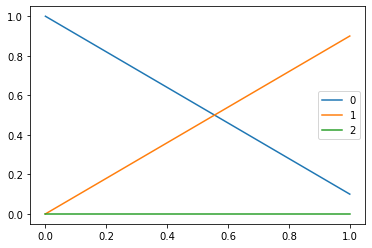

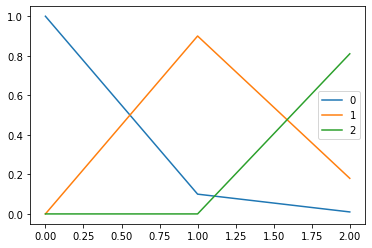

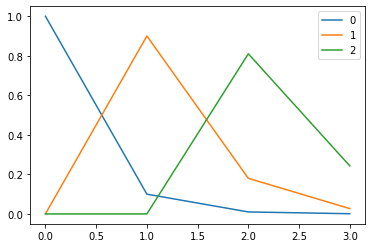

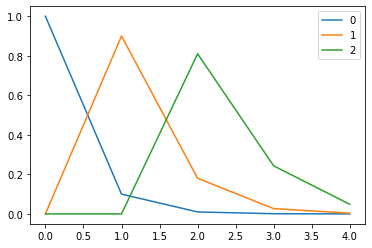

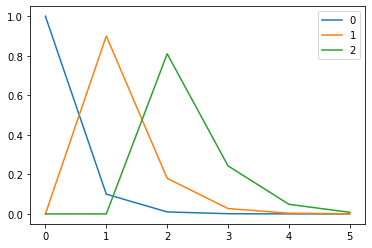

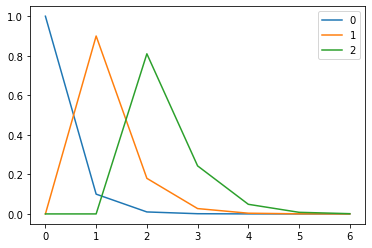

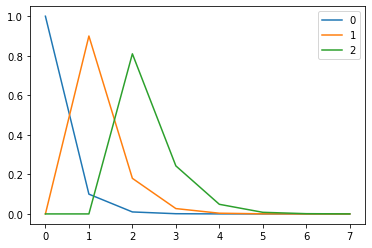

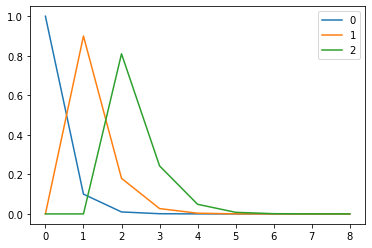

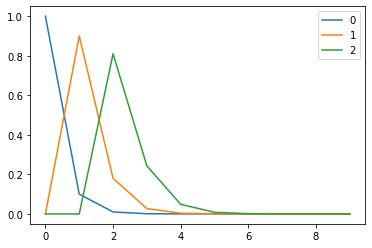

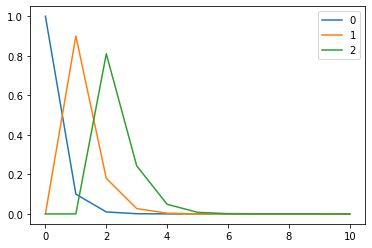

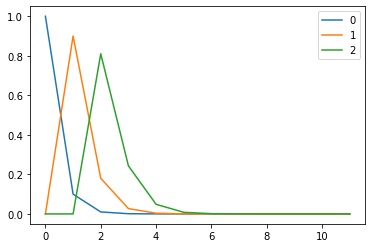

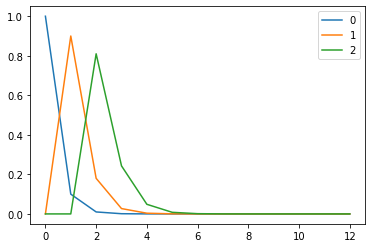

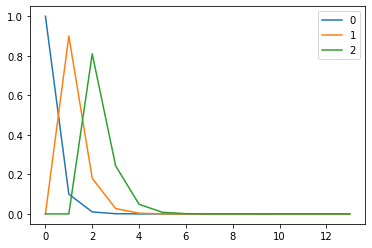

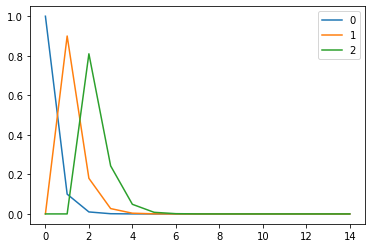

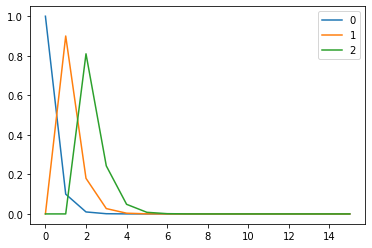

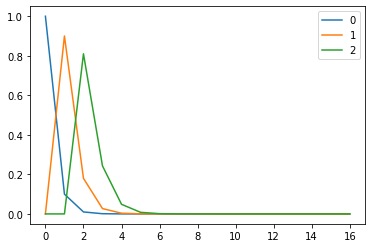

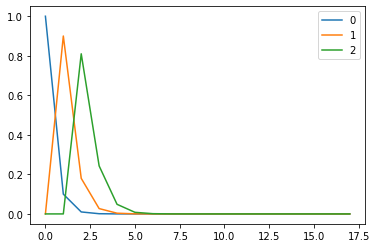

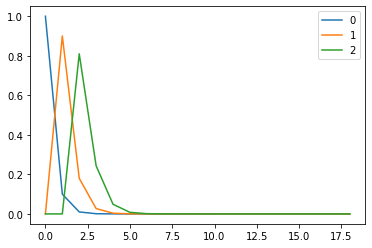

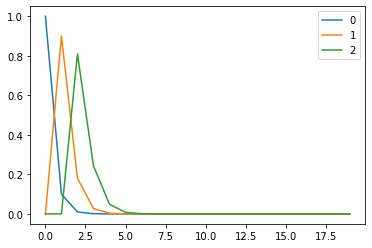

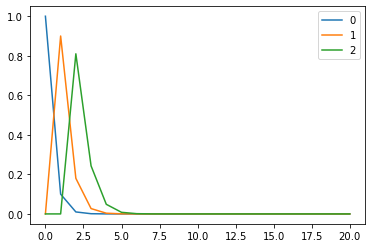

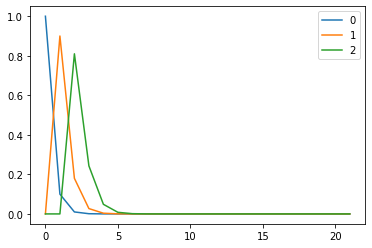

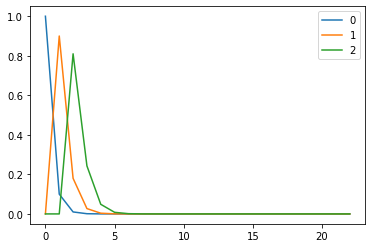

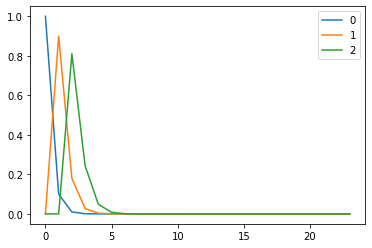

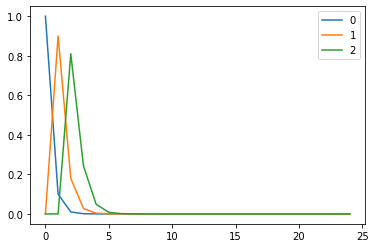

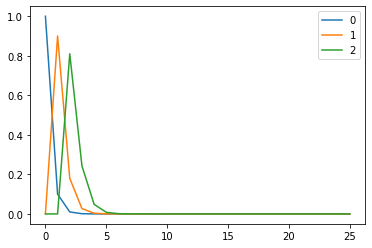

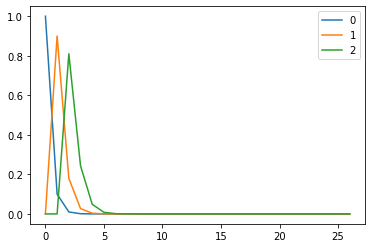

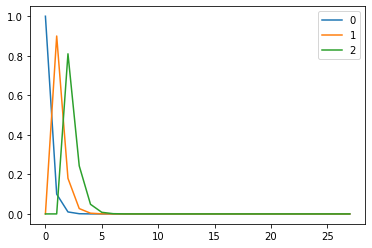

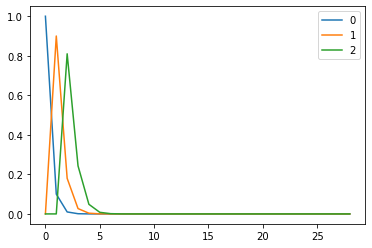

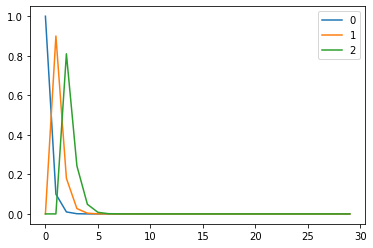

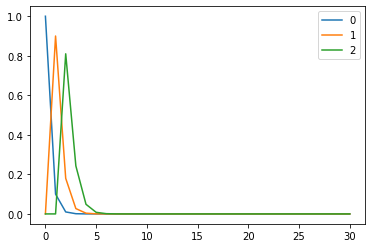

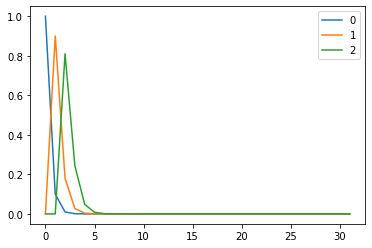

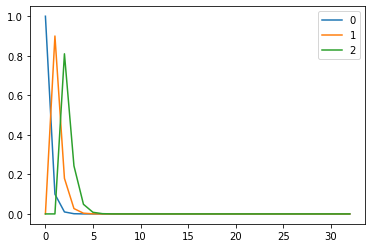

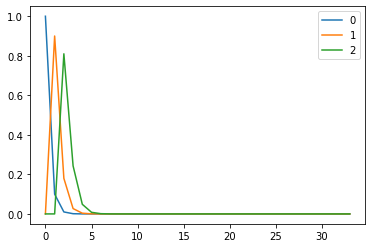

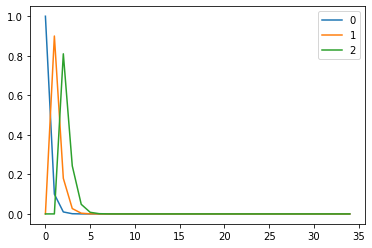

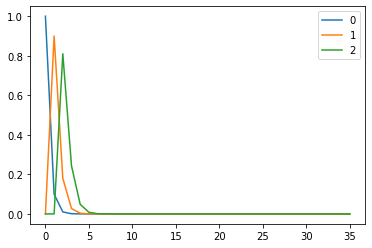

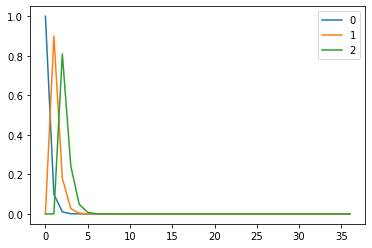

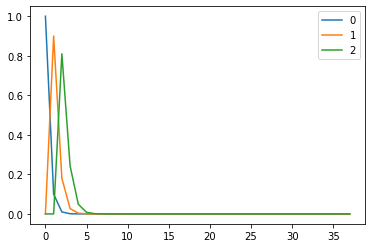

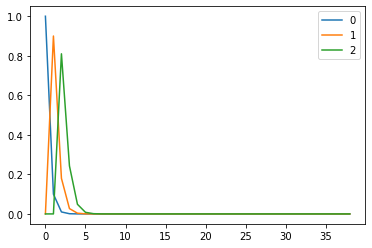

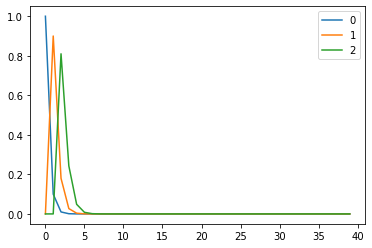

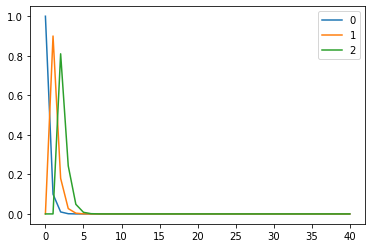

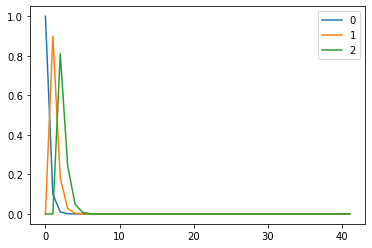

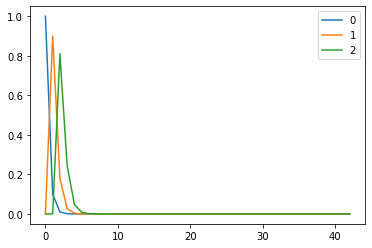

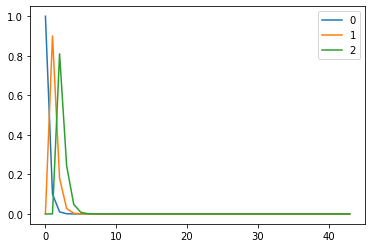

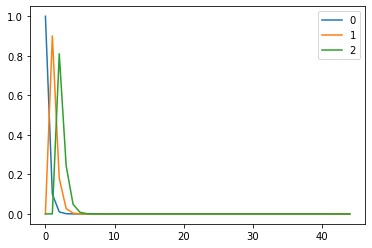

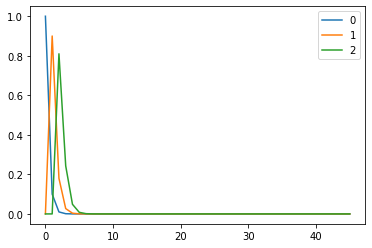

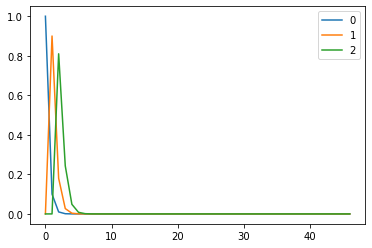

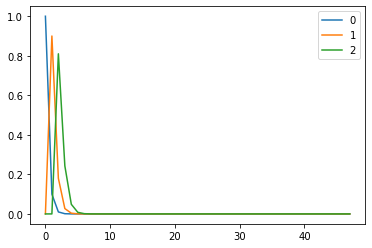

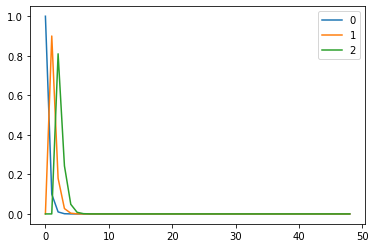

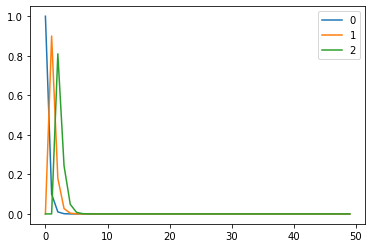

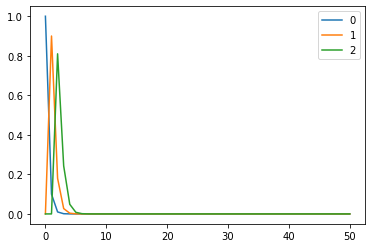

In [6]:
#https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e

stateChangeHist= np.array([[0.0, 0.0, 0.0],
                           [0.0, 0.0, 0.0],
                           [0.0, 0.0, 0.0]])


state = np.array([[1.0, 0.0, 0.0]])
currentState = 0
stateHist = state
dfStateHist = pd.DataFrame(state)
distr_hist = [[0,0,0]]
seed(4)

for x in range(50):
  state=np.dot(state,probability_matrix)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()

plt.show()

### Stationary Distribution

In [7]:
A=np.append(np.transpose(probability_matrix)-np.identity(3),[[1,1,1]],axis=0)
b=np.transpose(np.array([0,0,0,1]))
np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

array([0.20256583, 0.33760972, 0.40513167])

In [8]:
#use this to make the next move?

In [9]:
# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
    r = np.random.uniform(0.0, 1.0)
    CS = np.cumsum(vmultinomial)
    CS = np.insert(CS,0,0)
    m = (np.where(CS<r))[0]
    nextState = m[len(m)-1]
    return nextState

for x in range(1000):
    currentRow = np.ma.masked_values((P[currentState]), 0.0)
    nextState = simulate_multinomial(currentRow)  

    # Keep track of state changes  stateChangeHist[currentState,nextState]+=1  
    # Keep track of the state vector itself
    state = np.array([[0,0,0]])
    state[0,nextState] = 1.0  

    # Keep track of state history
    stateHist = np.append(stateHist,state,axis=0)
    currentState = nextState  

    # calculate the actual distribution over the 3 states so far
    totals = np.sum(stateHist,axis=0)
    gt = np.sum(totals)
    distrib = totals/gt
    distrib = np.reshape(distrib,(1,3))
    distr_hist = np.append(distr_hist,distrib,axis=0)

print(distrib)
P_hat = stateChangeHist/stateChangeHist.sum(axis=1)[:,None]

# Check estimated state transition probabilities based on history so far:print(P_hat)dfDistrHist = pd.DataFrame(distr_hist)# Plot the distribution as the simulation progresses over timedfDistrHist.plot(title="Simulation History")
plt.show()

IndexError: index 3 is out of bounds for axis 1 with size 3